# An example on how to do an FFT, PSD, HP filtering and Cross Correlation in Python

In [17]:
import numpy as np
import seaborn as sns
import scipy.signal
from scipy.signal import butter, welch
import nolds
import matplotlib.pyplot as plt
%matplotlib inline

49.9


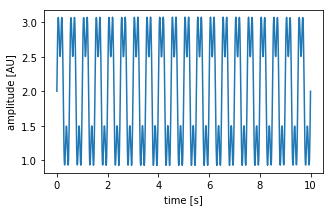

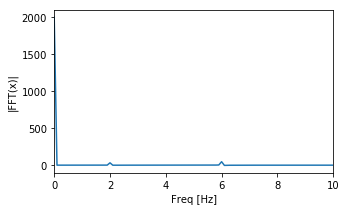

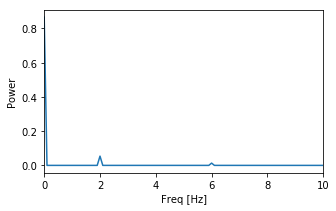

In [3]:
#An example of FFT 
Fs = 100 #sample rate
pi = np.pi

f0 = 2 #cycles per sec
f1 = 6
t = np.linspace(0,10,1000) 
x = np.sin(2*pi*f0*t) + 0.5*np.sin(2*pi*f1*t)+2
plt.figure(figsize=(5,3))
plt.plot(t,x)
plt.xlabel('time [s]')
plt.ylabel('amplitude [AU]')

Xf = np.fft.fft(x)
n = x.size
timestep = 1/Fs
freq = np.fft.fftfreq(n,d=timestep)
print(max(freq))
plt.figure(figsize=(5,3))
plt.plot(freq[:int(n/2)],Xf.real[:int(n/2)])
plt.xlim([0,10])
plt.xlabel('Freq [Hz]')
plt.ylabel('|FFT(x)|')

Pxx = np.abs(Xf)**2 #power spectrum
Pxx = Pxx/np.sum(Pxx) #relative power to total
plt.figure(figsize=(5,3))
plt.plot(freq[:int(n/2)],Pxx[:int(n/2)])
plt.xlim([0,10])
plt.xlabel('Freq [Hz]')
plt.ylabel('Power')

## Average PSD within bins

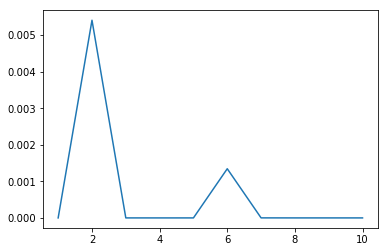

In [4]:
#power spectra averaged within bins
fm = 1; fM = 10; nbins = 10 #frequency bins
bin1 = int(timestep*n*fm)
bin2 = int(timestep*n*fM)
bins = np.linspace(bin1,bin2,nbins,dtype=int) #sample indices
deltab = int(0.5*np.diff(bins)[0]) #half the size of bin (in samples)
Pxxm = []
for i in bins:
    start = int(max(i-deltab,bins[0]))
    end = int(min(i+deltab,bins[-1]))
#     print(start,end)
#     print(np.mean(Pxx[start:end]))
    Pxxm.append(np.mean(Pxx[start:end]))
Pxxm = np.asarray(Pxxm)
plt.plot(bins/(timestep*n),Pxxm)

## Using the Welch method

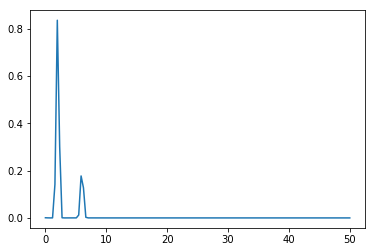

In [5]:
f,Pxx_den = welch(x,fs=Fs)
# plt.semilogy(f,Pxx_den)
plt.plot(f,Pxx_den)

# HP filter on the data

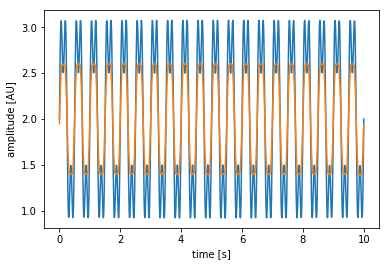

In [6]:
cutoff = 3
cutoff_norm = cutoff/(0.5*Fs)
b,a = butter(1,cutoff_norm,btype='lowpass',analog=False)
xfilt = scipy.signal.filtfilt(b,a,x)
plt.plot(t,x,t,xfilt)
plt.xlabel('time [s]')
plt.ylabel('amplitude [AU]')

In [7]:
#EXAMPLE of creating dict of dicts
# trial = 0
# s  = 'accel'
# clip_data={}
# clip_data[trial] = {}
# clip_data[trial][s] = clips
# s2 = 'gyro'
# clip_data[trial][s2] = clips
# # clip_data[trial]['size'] = clip_len

# Cross correlation of 2 timeseries

20.0 0.53


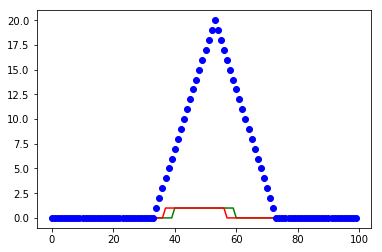

In [45]:
np.random.seed(10)
x = np.zeros((100,))
y = np.zeros((100,))
y[37:57]=np.ones((20,))
# y = np.random.randn(100)
x[40:60]=np.ones((20,))
xcorr_xy = np.correlate(x,y,mode='same')
xcorr_xy = xcorr_xy

peak = np.max(xcorr_xy) 
peak_lag = (np.argmax(xcorr_xy))/len(xcorr_xy)
print(peak,peak_lag)

plt.plot(x,'g')
plt.plot(y,'r')
plt.plot(xcorr_xy,'bo')
#Use same to return output of size max(M,N) with M,N being the length of y and x respectively
#By default, mode is ‘full’. This returns the convolution at each point of overlap, with an output shape of (N+M-1,).
#At the end-points of the convolution, the signals do not overlap completely, and boundary effects may be seen.

# Sample entropy

In [19]:
nolds.sampen(x)

0.030822111989872513

In [27]:
z = x+np.random.randn(x.shape[0])

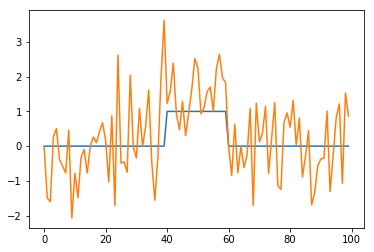

In [30]:
plt.plot(x)
plt.plot(z)

In [31]:
nolds.sampen(z)

2.871679624884012

In [32]:
z = np.sin(np.arange(100))

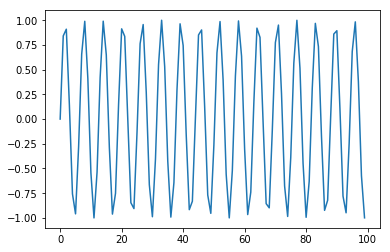

In [33]:
plt.plot(z)

In [34]:
nolds.sampen(z)

0.14448158255523327